In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Shop Customer Data.xlsx', index_col=0)
df

,Gender,Profession,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100)
CustomerID,,,,,,,
1,Male,Healthcare,19,15000,1,4,39
2,Male,Engineer,21,35000,3,3,81
3,Female,Engineer,20,86000,1,1,6
4,Female,Lawyer,23,59000,0,2,77
5,Female,Entertainment,31,38000,2,6,40
...,...,...,...,...,...,...,...
1996,Female,Artist,71,184387,8,7,40
1997,Female,Doctor,91,73158,7,7,32
1998,Male,Healthcare,87,90961,9,2,14


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_age = scaler.fit_transform(df[['Age']])
df_age = pd.DataFrame(df_age, columns=['Age'])
df_age

,Age
0,-1.054089
1,-0.983723
2,-1.018906
3,-0.913356
4,-0.631891
...,...
1995,0.775438
1996,1.479103
1997,1.338370
1998,0.986538


<Axes: ylabel='Frequency'>

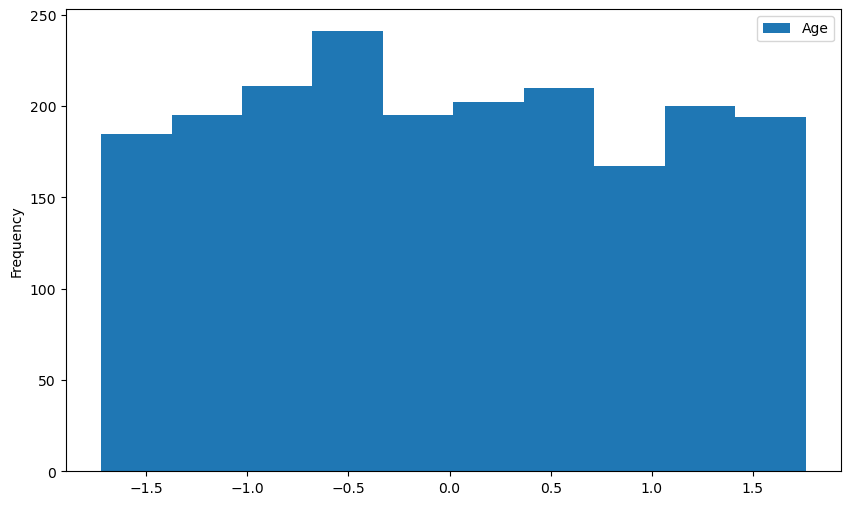

In [4]:
df_age.plot(kind = 'hist',figsize = (10, 6))

In [5]:
df_age.describe().round(2)

,Age
count,2000.00
mean,-0.00
std,1.00
min,-1.72
25%,-0.84
50%,-0.03
75%,0.85
max,1.76


In [6]:
columns = ['Age','Annual Income ($)','Work Experience','Family Size','Spending Score (1-100)']
data = df[columns]
data

,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100)
CustomerID,,,,,
1,19,15000,1,4,39
2,21,35000,3,3,81
3,20,86000,1,1,6
4,23,59000,0,2,77
5,31,38000,2,6,40
...,...,...,...,...,...
1996,71,184387,8,7,40
1997,91,73158,7,7,32
1998,87,90961,9,2,14


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalization = scaler.fit_transform(data)
df = pd.DataFrame(normalization, columns=columns)
df.round(2)

,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100)
0,-1.05,-2.09,-0.79,0.12,-0.43
1,-0.98,-1.66,-0.28,-0.39,1.08
2,-1.02,-0.54,-0.79,-1.41,-1.61
3,-0.91,-1.13,-1.05,-0.90,0.93
4,-0.63,-1.59,-0.54,1.13,-0.39
...,...,...,...,...,...
1995,0.78,1.61,0.99,1.64,-0.39
1996,1.48,-0.82,0.74,1.64,-0.68
1997,1.34,-0.43,1.25,-0.90,-1.32
1998,0.99,1.56,0.74,-0.90,-1.68


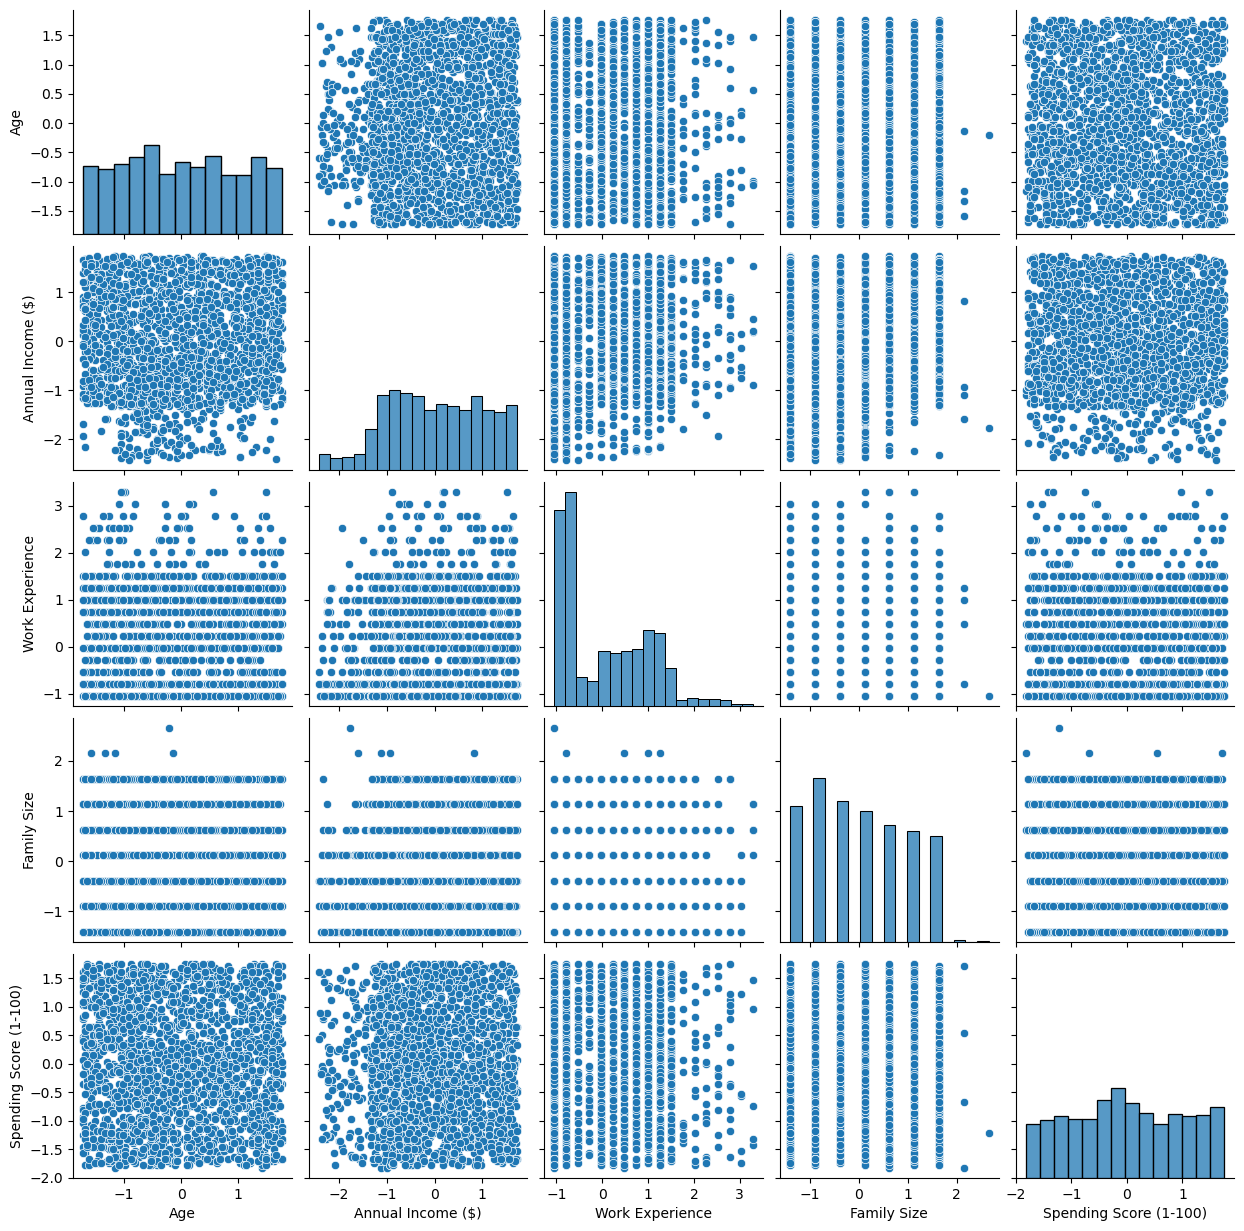

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, kind="scatter")
plt.savefig('after standardization.png')
plt.show()

In [9]:
df.describe().round(2)

,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100)
count,2000.00,2000.00,2000.00,2000.00,2000.00
mean,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.72,-2.42,-1.05,-1.41,-1.82
25%,-0.84,-0.79,-0.79,-0.90,-0.82
50%,-0.03,-0.02,-0.28,0.12,-0.03
75%,0.85,0.84,0.74,0.63,0.86
max,1.76,1.73,3.29,2.66,1.76


***

In [10]:
# for quick calculation
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
age = [[50], [18], [35], [44], [29], [30], [60], [55], [25], [43]]
age = np.array(age)
normalization = scaler.fit_transform(age)
df = pd.DataFrame(normalization)
df.round(2)

,0
0,0.85
1,-1.61
2,-0.30
3,0.39
4,-0.76
5,-0.68
6,1.62
7,1.24
8,-1.07
9,0.32


In [11]:
age.mean()

38.9

In [12]:
age.std()

13.011149065320865

In [13]:
(25 - age.mean())/age.std()

-1.0683145608598263